Прежде, чем написать программу для нейросетей, нужно понимать, что такое «Нейронные сети».

**Нейронная сеть** — это последовательность вычислительных единиц, соединенных между собой особым образом.

Структура нейронной сети пришла в мир программирования прямиком из биологии. Благодаря такой структуре, машина обретает способность анализировать и даже запоминать различную информацию.

Нейросети используются для решения сложных задач, которые требуют аналитических вычислений подобных тем, что делает человеческий мозг. Самыми распространенными применениями нейронных сетей является:
*   Классификация — распределение данных по параметрам.
*   Предсказание — возможность предсказывать следующий шаг.
*   Распознавание — в настоящее время, самое широкое применение нейронных сетей.

На этом и следующих занятиях мы будем создавать нейронные сети для распознавания изображений. Ниже вы видите фрагмент кода на языке Python. Если вы находитесь в какой-нибудь среде выполнения, вы можете запустить программу, нажав на кнопку «Выполнить» слева, например.

Данный блок загружает необходимые библиотеки для создания и работы с нейросетями и базами изображений. Четвертая строчка необходима для корректной работы наших программ.

In [ ]:
import os
import sys
import numpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

Мы будем использовать базу изображений MNIST. Она содержит изображения написанных от руки цифр и символов латинского алфавита. Размер базы сравнительно небольшой, что делает её удобной для упражнений по классификации.

In [ ]:
dataset_path = os.path.join(os.path.dirname(sys.argv[0]), 'mnist.npz')

Далее производим загрузку набора данных. Получаем обучающую часть (входные данные и входные метки) и контрольную часть (выходные данные и выходные метки)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(dataset_path)

11493376/11490434 [==============================] - 0s 0us/step


Отобразим визуальную информацию о количестве изображений, диапазоне изображений и цифр.

In [ ]:
print(f'Training: {train_images.shape[0]} images {train_images.shape[1]}x{train_images.shape[2]}')
print(f'Training range: {train_images.min()} to {train_images.max()}')
print(f'Training labels: {train_labels.min()} to {train_labels.max()}')

Training: 60000 images 28x28
Training range: 0 to 255
Training labels: 0 to 9


Описываем структуру сети. Будем использовать простую нейросеть без петель. Первый слой будет превращать матрицу чисел в 1D-вектор. Далее используем два скрытых слоя из 16 нейронов с функцией активации ReLU и один выходной слой из 10 нейронов.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

Нейрон — это вычислительная единица, которая получает информацию, производит над ней простые вычисления и передает ее дальше. Они делятся на три основных типа: входной (синий), скрытый (красный) и выходной (зеленый).

У каждого из нейронов есть 2 основных параметра: входные данные (input data) и выходные данные (output data). В случае входного нейрона: input=output. В остальных, в поле input попадает суммарная информация всех нейронов с предыдущего слоя, после чего, она нормализуется, с помощью функции активации и попадает в поле output.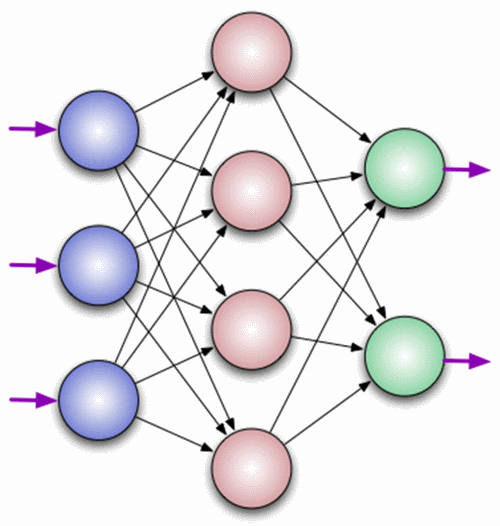

Произведем подготовку к обучению. Мы будем использовать алгоритм обучения «adam». Для обучения необходима функция потерь сети – кросс-энтропия, которая используется для классификации. Метрика качества – «accuracy».

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Следующий метод регулирует параметры модели, чтобы минимизировать потери:

In [ ]:
model.fit(train_images, train_labels, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 1.5848 - accuracy: 0.6289
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5957 - accuracy: 0.8306
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4604 - accuracy: 0.8704
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4182 - accuracy: 0.8831
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3901 - accuracy: 0.8902


После получения оптимальных параметров модели, выводим значений потерь в обучающей и контрольной выборке.

In [ ]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
print(f'Accuracy on training images: {train_acc}')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Accuracy on testing images: {test_acc}')

1875/1875 - 2s - loss: 0.3379 - accuracy: 0.9042
Accuracy on training images: 0.9041833281517029
313/313 - 0s - loss: 0.3684 - accuracy: 0.9003
Accuracy on testing images: 0.9003000259399414


И, наконец, сохраняем нейронную сеть.

In [ ]:
model.save('digits.h5')

**Домашнее задание**

Создайте программу, обучающую простую нейронную сеть с одним скрытым слоем распознавать цифры на базе изображений MNIST.

*   Для загрузки данных используйте модуль tensorflow.keras.datasets.mnist. Убедитесь, что загруженная база сохраняется в каталоге скрипта (см. документацию к функции load_data()). 
*   Модель сети должна иметь тип Sequential и состоять из трёх слоев: входного слоя типа Flatten (так как входные данные - изображения), двух скрытых слоёв типа Dense(размер слоя 32 и функция активации relu) и выходного слоя типа Dense(10 нейронов, без функции активации).
*   При компиляции модели укажите тип оптимизатора 'adam', функцию потерь SparseCategoricalCrossentropy и метрику точности ('accuracy').
*   Обучите сеть методом .fit() в течении 10 эпох, затем оцените точность работы сети на обучающей и контрольной методом .evaluate().
*   Сохраните обученную сеть методом .save() в файл с расширением .h5.